<a href="https://colab.research.google.com/github/rozhrafiee/socialnetwork/blob/main/social_networks1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of nodes: 34
Number of edges: 78
List of nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
List of edges: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


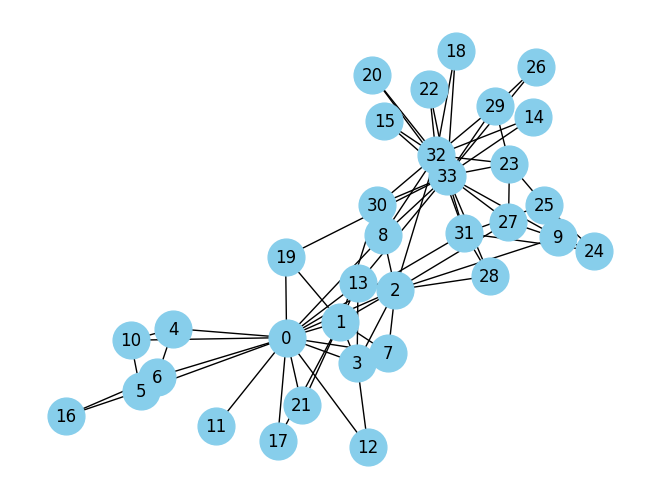

List of neighbors mr_hi: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]


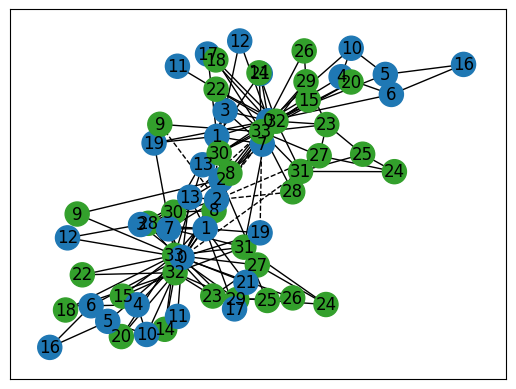

In [ ]:
#pdf1
import networkx as nx
import matplotlib.pyplot as plt

# Load Zachary's Karate Club dataset
G = nx.karate_club_graph()

# Display basic graph information
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# List nodes and edges
print("List of nodes:", list(G.nodes))
print("List of edges:", list(G.edges))

# Visualize the graph
nx.draw(G, with_labels=True, node_color="skyblue", node_size=700)
plt.show()

#3 approaches to check whether we have mr_hi node or not

#1
mr_hi = 0
mr_hi in G

#2
G.has_node(mr_hi)

#3
mr_hi in G.nodes

#accessing to neighbors of a node
print("List of neighbors mr_hi:", list(G.neighbors(mr_hi)))

#dividing the members of Zakari karate club into two groups 0 and 1
#this code is for adding an attribute(property) to each node
member_club = [
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1]
for node_id in G.nodes:
  G.nodes[node_id]['club'] = member_club[node_id]

node_colors = ['#1f78b4' if G.nodes[v]['club'] == 0 else '#33a02c' for v in G]
nx.draw_networkx(G, with_labels=True, node_color = node_colors)

# Assign 'internal' property to edges
for v, w in G.edges:
    # Compare 'club' property of edge endpoints
    # Set 'internal' property to True if they match, False otherwise
    if G.nodes[v]['club'] == G.nodes[w]['club']:
        G.edges[v, w]['internal'] = True
    else:
        G.edges[v, w]['internal'] = False

# Classify edges as internal or external
internal = [e for e in G.edges if G.edges[e]['internal']]
external = [e for e in G.edges if not G.edges[e]['internal']]

# Define layout for nodes
k_pos = nx.spring_layout(G)

# Draw nodes and node labels
nx.draw_networkx_nodes(G, k_pos, node_color=node_colors)
nx.draw_networkx_labels(G, k_pos)  # Correct label drawing function

# Draw internal edges as solid lines
nx.draw_networkx_edges(G, k_pos, edgelist=internal)

# Draw external edges as dashed lines
nx.draw_networkx_edges(G, k_pos, edgelist=external, style="dashed")






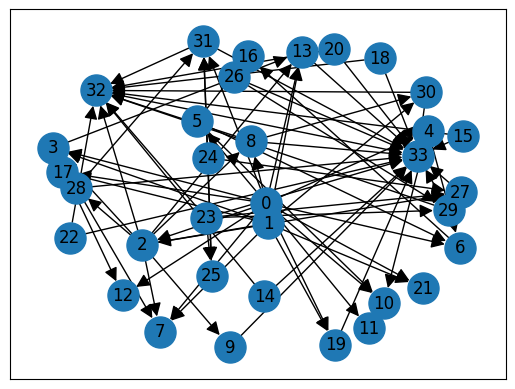

[32, 33]

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load Zachary's Karate Club dataset
karate_club = nx.karate_club_graph()

# Convert to a DataFrame
df = pd.DataFrame(list(karate_club.edges), columns=['n1', 'n2'])

# Create a directed graph
G = nx.from_pandas_edgelist(df, 'n1', 'n2', create_using=nx.DiGraph())

# Define layout with a fixed seed for consistency
k_pos = nx.spring_layout(G, k=1.5, seed=42)

# Draw the graph
nx.draw_networkx(G, k_pos, arrowsize=20, node_size=500, with_labels=True)

# Show the graph
plt.show()

#returning external neighbors of node22
list(G.successors(22))

In [ ]:
import networkx as nx
import pandas as pd

# Load the Zachary Karate Club graph from NetworkX as a directed graph
G = nx.karate_club_graph()

# Create a directed graph explicitly using the existing graph data
G_directed = nx.from_pandas_edgelist(nx.to_pandas_edgelist(G), create_using=nx.DiGraph())

# Convert the directed graph to a pandas DataFrame (edge list)
df = nx.to_pandas_edgelist(G_directed)

# List the edges connected to node 2
edges_node_2 = list(G_directed.edges(2))
print("Edges of node 2:", edges_node_2)

# Additional operations
print("Outgoing edges from node 2:", list(G_directed.out_edges(2)))
print("Incoming edges to node 2:", list(G_directed.in_edges(2)))
print("All edges in the directed graph:", list(G_directed.edges))

# Convert to an undirected graph
G1 = G_directed.to_undirected()
print("All edges in the undirected graph:", list(G1.edges))

# Convert to an undirected graph with true reciprocal
G2 = G_directed.to_undirected(reciprocal=True)
list(G2.edges)


Edges of node 2: [(2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32)]
Outgoing edges from node 2: [(2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32)]
Incoming edges to node 2: [(0, 2), (1, 2)]
All edges in the directed graph: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (13, 33), (19, 33), (31, 32), (31, 33), (30, 32), (30, 33), (9, 33), (27, 33), (28, 31), (28, 33), (32, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (25, 31), (29, 32), (29, 33), (24, 25), (24, 27), (24, 31), (26, 29), (26, 33)]
All edges in the undire

[]

In [ ]:
# The seven bridges of Königsberg
import networkx as nx

G = nx.MultiGraph()
G.add_edges_from([
    ("North Bank", "Kneiphof", {"bridge": "Krämerbrücke"}),
    ("North Bank", "Kneiphof", {"bridge": "Schmiedebrücke"}),
    ("North Bank", "Lomse", {"bridge": "Holzbrücke"}),
    ("Lomse", "Kneiphof", {"bridge": "Dombrücke"}),
    ("Lomse", "North Bank", {"bridge": "Grüne Brücke"}),
    ("South Bank", "Kneiphof", {"bridge": "Köttelbrücke"}),
    ("South Bank", "Lomse", {"bridge": "Hohe Brücke"})
])

print(list(G.edges)[0])

print(G.edges["North Bank", "Kneiphof", 0])

('North Bank', 'Kneiphof', 0)
{'bridge': 'Krämerbrücke'}


Top 4 nodes by degree centrality: [('D', 1.0), ('C', 0.75), ('E', 0.75), ('A', 0.5)]
Top 4 nodes by closeness centrality: [('D', 1.0), ('C', 0.8), ('E', 0.8), ('A', 0.6666666666666666)]
Top 4 nodes by betweenness centrality: [('D', 2.0), ('C', 0.5), ('E', 0.5), ('A', 0.0)]


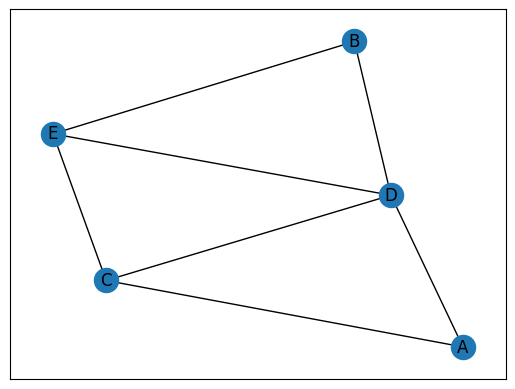

In [ ]:
#pdf2
import networkx as nx  # For graph creation and analysis

# Create an undirected graph
G = nx.Graph()

# Add nodes and edges
G.add_node('A')
G.add_nodes_from(['B', 'C', 'D', 'E'])
G.add_edge('A', 'C')
G.add_edges_from([('B', 'E'), ('A', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'B'), ('D', 'E')])

# Visualize the graph
nx.draw_networkx(G)

# Calculate degree centrality (connectivity measure for nodes)
degree = nx.degree_centrality(G)
# Get the top 4 nodes by degree centrality
top_degree_centralities = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:4]
print("Top 4 nodes by degree centrality:", top_degree_centralities)

# Calculate closeness centrality (measures how close a node is to all others)
closeness = nx.closeness_centrality(G, wf_improved=True)
# Get the top 4 nodes by closeness centrality
top_closeness_centralities = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:4]
print("Top 4 nodes by closeness centrality:", top_closeness_centralities)

# Calculate betweenness centrality
betweenness = nx.betweenness_centrality(G, normalized=False)
# Get the top 4 nodes by betweenness centrality
top_betweenness_centralities = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:4]
print("Top 4 nodes by betweenness centrality:", top_betweenness_centralities)


Top 5 nodes by normalized closeness centrality: [('E', 0.8), ('D', 0.5), ('B', 0.44999999999999996), ('C', 0.25), ('A', 0.0)]
Top 5 nodes by normalized closeness centrality (reversed graph): [('A', 0.6666666666666666), ('C', 0.5625), ('D', 0.5), ('B', 0.25), ('E', 0.0)]
Top 5 nodes by unnormalized closeness centrality (reversed graph): [('B', 1.0), ('D', 1.0), ('C', 0.75), ('A', 0.6666666666666666), ('E', 0.0)]
Top 4 nodes by betweenness centrality: [('D', 2.0), ('C', 0.5), ('E', 0.5), ('A', 0.0)]


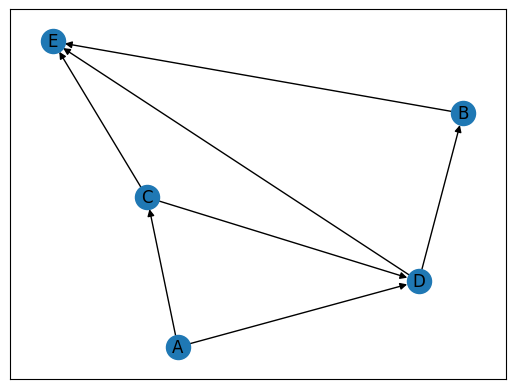

In [ ]:
# Importing the NetworkX library for working with graphs
import networkx as nx

# Creating a directed graph (G2)
G2 = nx.DiGraph()

# Adding nodes to the graph
G2.add_node('A')  # Adding a single node 'A'
G2.add_nodes_from(['B', 'C', 'D', 'E'])  # Adding multiple nodes

# Adding edges to represent directed connections between nodes
G2.add_edge('A', 'C')  # Adding a single edge from 'A' to 'C'
G2.add_edges_from([('B', 'E'), ('A', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'B'), ('D', 'E')])  # Adding multiple edges

# Visualizing the directed graph
nx.draw_networkx(G2)

# Calculating and displaying closeness centrality for G2
# Closeness centrality measures how easily a node can reach other nodes in the graph
closeness = nx.closeness_centrality(G2, wf_improved=True)  # Normalized closeness centrality
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]  # Top 5 nodes
print("Top 5 nodes by normalized closeness centrality:", sorted_closeness)

# Calculating and displaying closeness centrality for the reversed graph
# Reversing the graph gives insights into how reachable each node is when connections are inverted
closeness_reversed = nx.closeness_centrality(G2.reverse(), wf_improved=True)
sorted_closeness_reversed = sorted(closeness_reversed.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by normalized closeness centrality (reversed graph):", sorted_closeness_reversed)

# Calculating and displaying unnormalized closeness centrality for the reversed graph
closeness_reversed_unnormalized = nx.closeness_centrality(G2.reverse(), wf_improved=False)
sorted_closeness_reversed_unnormalized = sorted(closeness_reversed_unnormalized.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by unnormalized closeness centrality (reversed graph):", sorted_closeness_reversed_unnormalized)

# Calculate betweenness centrality
betweenness = nx.betweenness_centrality(G, normalized=False)
# Get the top 4 nodes by betweenness centrality
top_betweenness_centralities = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:4]
print("Top 4 nodes by betweenness centrality:", top_betweenness_centralities)

# Explanation:
# Closeness centrality shows how quickly a node can access all other nodes via the shortest paths.
# In normalized closeness centrality, the results are adjusted based on the graph size.
# For undirected, fully connected graphs, normalized and unnormalized closeness centrality values are identical.


[(0, 0.5133681370460056),
 (2, 0.5133681370460056),
 (3, 0.47337089900084517),
 (1, 0.38441577299424384),
 (4, 0.2375887703642487),
 (5, 0.16120160091894561),
 (6, 0.09647910976519784),
 (7, 0.09647910976519784)]

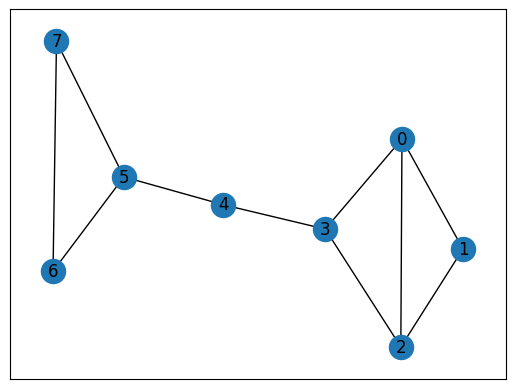

In [ ]:
#pdf3
import networkx as nx
G = nx.Graph()
G.add_node(0)
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edge(1, 2)
G.add_edges_from([(0, 1), (0, 2), (0, 3), (2, 3), (3, 4),(4, 5), (5, 6), (5, 7), (7, 6)])
nx.draw_networkx(G)
#eigenvector centrality
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

In [ ]:
#eigenvector centrality for directed and undirected graph based on inward edges
eigenvector2 = nx.eigenvector_centrality_numpy(G)
sorted(eigenvector2.items(), key=lambda x:x[1], reverse=True)

[(2, 0.5133713984578481),
 (0, 0.5133713984578478),
 (3, 0.47337165576734),
 (1, 0.3844187948177325),
 (4, 0.23758388111163115),
 (5, 0.16119029043069272),
 (7, 0.09646934721619951),
 (6, 0.09646934721619943)]

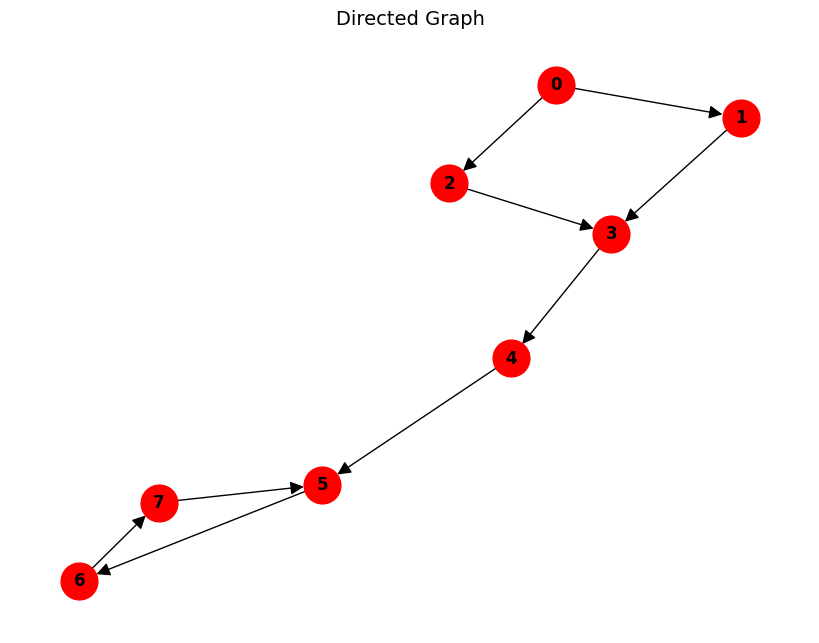

PageRank values (default method) sorted in descending order:
Node 5: 0.2865
Node 6: 0.2622
Node 7: 0.2416
Node 4: 0.0733
Node 3: 0.0642
Node 1: 0.0267
Node 2: 0.0267
Node 0: 0.0188


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
nodes = [0, 1, 2, 3, 4, 5, 6, 7]
G.add_nodes_from(nodes)

# Add edges to the graph
edges = [
    (0, 1), (0, 2), (1, 3), (2, 3),
    (3, 4), (4, 5), (5, 6), (6, 7),
    (7, 5)
]
G.add_edges_from(edges)

# Define node positions for accurate visualization
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(
    G, pos, with_labels=True,
    node_size=700, node_color="red",
    font_size=12, font_weight="bold",
    arrowsize=20
)
plt.title("Directed Graph", fontsize=14)
plt.show()

# Calculate PageRank centrality using the default pagerank method
pagerank_default = nx.pagerank(G)

# Sort nodes by their PageRank values in descending order
sorted_default = sorted(pagerank_default.items(), key=lambda x: x[1], reverse=True)
print("PageRank values (default method) sorted in descending order:")
for node, value in sorted_default:
    print(f"Node {node}: {value:.4f}")

#ایراد دارد
# Calculate PageRank using the NumPy-based implementation
#pagerank_numpy = nx.pagerank_numpy(G)

# Sort nodes by their PageRank values
#sorted_numpy = sorted(pagerank_numpy.items(), key=lambda x: x[1], reverse=True)
#print("\nPageRank values (NumPy method) sorted in descending order:")
#for node, value in sorted_numpy:
#    print(f"Node {node}: {value:.4f}")

# Calculate PageRank using the SciPy-based implementation
#pagerank_scipy = nx.pagerank_scipy(G)

# Sort nodes by their PageRank values
#sorted_scipy = sorted(pagerank_scipy.items(), key=lambda x: x[1], reverse=True)
#print("\nPageRank values (SciPy method) sorted in descending order:")
#for node, value in sorted_scipy:
#    print(f"Node {node}: {value:.4f}")




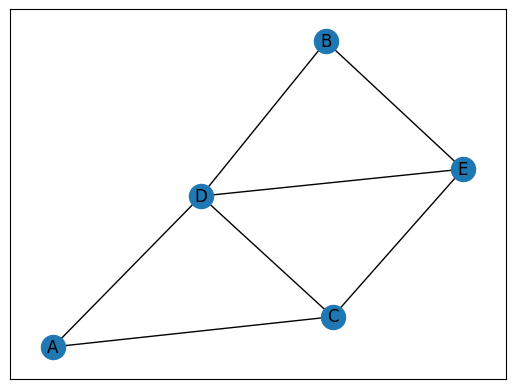

In [ ]:
#pdf6
import networkx as nx
G = nx.Graph()
G.add_node('A')
G.add_nodes_from(['B', 'C', 'D', 'E'])
G.add_edge('A', 'C')
G.add_edges_from([('B', 'E'), ('A', 'D'),('C', 'D'), ('C', 'E'), ('D', 'B'), ('D', 'E')])
nx.draw_networkx(G)

In [ ]:
import networkx as nx

# تعریف تابع انتشار ساده
def propagate_simple(G):
    to_infect = set()  # مجموعه‌ای برای نگهداری گره‌هایی که باید آلوده شوند

    # بررسی گره‌های غیرآلوده
    for v in G.nodes():
        if not G.nodes[v]['infected']:  # اگر گره آلوده نباشد
            for w in nx.neighbors(G, v):  # بررسی همسایه‌های گره
                if G.nodes[w]['infected']:  # اگر یکی از همسایه‌ها آلوده باشد
                    to_infect.add(v)  # گره فعلی را برای آلودگی اضافه کن
                    break

    # آلوده کردن گره‌های جدید
    for v in to_infect:
        G.nodes[v]['infected'] = True

    # چاپ گره‌های آلوده‌شده
    print("Infected nodes:", [v for v in G.nodes() if G.nodes[v]['infected']])


# ایجاد گراف نمونه
G = nx.Graph()  # ساخت یک گراف غیرجهت‌دار
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E')])  # افزودن یال‌ها

# مقداردهی اولیه ویژگی "infected" به False
nx.set_node_attributes(
    G,
    {i: False for i in G.nodes},  # مقدار پیش‌فرض: همه گره‌ها غیرآلوده
    'infected'
)

# آلوده کردن گره اولیه
G.nodes['A']['infected'] = True

# اجرای انتشار ساده
propagate_simple(G)  # مرحله اول انتشار
propagate_simple(G)  # مرحله دوم انتشار

# بررسی و چاپ گره‌های آلوده
to_infect = set()  # مجموعه‌ای برای نگهداری گره‌های آلوده
for v in G.nodes():
    if G.nodes[v]['infected']:  # اگر گره آلوده باشد
        to_infect.add(v)  # به مجموعه اضافه کن

# چاپ گره‌های آلوده نهایی
print("Final infected nodes:")
for v in to_infect:
    print(v)

# تعریف تابع انتشار پیچیده (مدل دوم)
def propagate_complex(G):
    to_infect = set()  # مجموعه‌ای برای گره‌هایی که باید آلوده شوند

    # پیدا کردن گره‌های غیرآلوده
    for v in G.nodes():
        if not G.nodes[v]['infected']:  # اگر گره آلوده نباشد
            infected_neighbors = 0  # شمارش همسایه‌های آلوده
            for w in nx.neighbors(G, v):  # بررسی همسایه‌ها
                if G.nodes[w]['infected']:  # اگر همسایه آلوده باشد
                    infected_neighbors += 1
            # اگر دو یا بیشتر از دو همسایه آلوده باشند
            if infected_neighbors >= 2:
                to_infect.add(v)  # گره فعلی برای آلودگی انتخاب می‌شود

    # آلوده کردن گره‌های جدید
    for v in to_infect:
        G.nodes[v]['infected'] = True

    # چاپ گره‌های آلوده‌شده
    print("Infected nodes (complex model):", [v for v in G.nodes() if G.nodes[v]['infected']])


# مقداردهی اولیه دوباره برای آزمایش انتشار پیچیده
nx.set_node_attributes(
    G,
    {i: False for i in G.nodes},  # بازنشانی گره‌ها به غیرآلوده
    'infected'
)
G.nodes['A']['infected'] = True  # آلوده کردن گره A
G.nodes['D']['infected'] = True  # آلوده کردن گره D

# اجرای انتشار پیچیده
propagate_complex(G)  # شبیه‌سازی یک مرحله انتشار پیچیده

# بررسی و چاپ گره‌های آلوده
to_infect = set()  # مجموعه گره‌های آلوده
for v in G.nodes():
    if G.nodes[v]['infected']:  # اگر گره آلوده باشد
        to_infect.add(v)  # به مجموعه اضافه کن

# چاپ گره‌های آلوده نهایی
print("Final infected nodes (complex model):")
for v in to_infect:
    print(v)


Infected nodes: ['A', 'B', 'C']
Infected nodes: ['A', 'B', 'C', 'D', 'E']
Final infected nodes:
A
C
D
E
B
Infected nodes (complex model): ['A', 'B', 'D']
Final infected nodes (complex model):
A
D
B


In [ ]:
import random

def IC(G, seed, probability):
    """
    مدل انتشار مستقل (Independent Cascade - IC):
    این تابع شبیه‌سازی انتشار اطلاعات را بر اساس مدل IC انجام می‌دهد.

    ورودی‌ها:
        G: گراف (به صورت دیکشنری که گره‌ها و همسایگانشان را نشان می‌دهد)
        seed: لیستی از گره‌هایی که در ابتدا آلوده (تحت تأثیر) شده‌اند
        probability: احتمال تأثیرگذاری یک گره بر گره‌های همسایه‌اش

    خروجی:
        مجموعه‌ای از گره‌های آلوده
    """
    # گره‌های آلوده‌ی اولیه را در لیست active ذخیره می‌کنیم
    active = list(seed)
    # گره‌هایی که تا کنون تحت تأثیر قرار گرفته‌اند را در مجموعه influenced ذخیره می‌کنیم
    influenced = set(seed)

    print(f"گره‌های اولیه آلوده: {seed}")  # نمایش گره‌های اولیه آلوده

    # تا زمانی که گره‌های فعال وجود داشته باشند
    step = 1  # شمارنده‌ی مراحل
    while active:
        print(f"\nمرحله {step}:")  # نمایش مرحله فعلی
        # لیست جدیدی برای گره‌هایی که در این مرحله آلوده می‌شوند
        new_active = []
        for node in active:
            # بررسی همسایگان گره فعال
            for neighbor in G[node]:
                # اگر همسایه هنوز آلوده نشده باشد
                if neighbor not in influenced:
                    # بر اساس احتمال تأثیرگذاری تصمیم‌گیری می‌کنیم
                    if random.random() <= probability:
                        influenced.add(neighbor)  # اضافه کردن گره به مجموعه‌ی آلوده‌ها
                        new_active.append(neighbor)  # اضافه کردن گره به لیست فعال‌های جدید

        print(f"گره‌های جدید آلوده‌شده در این مرحله: {new_active}")  # نمایش گره‌های آلوده جدید
        print(f"مجموع گره‌های آلوده تا این مرحله: {list(influenced)}")  # نمایش کل گره‌های آلوده
        active = new_active  # گره‌های فعال را به‌روز می‌کنیم
        step += 1  # افزایش شمارنده‌ی مراحل

    print("\nانتشار به پایان رسید.")
    return influenced  # بازگرداندن مجموعه‌ی نهایی گره‌های آلوده


# مثال از یک گراف برای تست:
G = {
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 4],
    3: [1, 5],
    4: [1, 2, 5],
    5: [3, 4]
}

# گره‌های آلوده اولیه
seed = [0]
# احتمال تأثیرگذاری
probability = 0.5

# اجرای تابع
result = IC(G, seed, probability)

# نمایش گره‌های آلوده نهایی
print(f"\nگره‌های نهایی آلوده‌شده: {list(result)}")


گره‌های اولیه آلوده: [0]

مرحله 1:
گره‌های جدید آلوده‌شده در این مرحله: [1, 2]
مجموع گره‌های آلوده تا این مرحله: [0, 1, 2]

مرحله 2:
گره‌های جدید آلوده‌شده در این مرحله: [3]
مجموع گره‌های آلوده تا این مرحله: [0, 1, 2, 3]

مرحله 3:
گره‌های جدید آلوده‌شده در این مرحله: []
مجموع گره‌های آلوده تا این مرحله: [0, 1, 2, 3]

انتشار به پایان رسید.

گره‌های نهایی آلوده‌شده: [0, 1, 2, 3]


Tie Strengths: {(0, 1): 8, (0, 2): 6, (0, 3): 6, (0, 4): 3, (0, 5): 3, (0, 6): 3, (0, 7): 4, (0, 8): 2, (0, 10): 3, (0, 11): 1, (0, 12): 2, (0, 13): 4, (0, 17): 2, (0, 19): 2, (0, 21): 2, (0, 31): 1, (1, 2): 5, (1, 3): 5, (1, 7): 4, (1, 13): 4, (1, 17): 2, (1, 19): 2, (1, 21): 2, (1, 30): 1, (2, 3): 5, (2, 7): 4, (2, 8): 3, (2, 9): 1, (2, 13): 4, (2, 27): 1, (2, 28): 1, (2, 32): 2, (3, 7): 4, (3, 12): 2, (3, 13): 4, (4, 6): 2, (4, 10): 2, (5, 6): 3, (5, 10): 2, (5, 16): 2, (6, 16): 2, (8, 30): 3, (8, 32): 4, (8, 33): 3, (9, 33): 1, (13, 33): 1, (14, 32): 2, (14, 33): 2, (15, 32): 2, (15, 33): 2, (18, 32): 2, (18, 33): 2, (19, 33): 1, (20, 32): 2, (20, 33): 2, (22, 32): 2, (22, 33): 2, (23, 25): 1, (23, 27): 2, (23, 29): 3, (23, 32): 3, (23, 33): 4, (24, 25): 2, (24, 27): 1, (24, 31): 2, (25, 31): 2, (26, 29): 2, (26, 33): 2, (27, 33): 2, (28, 31): 2, (28, 33): 2, (29, 32): 3, (29, 33): 4, (30, 32): 3, (30, 33): 3, (31, 32): 2, (31, 33): 3, (32, 33): 11}


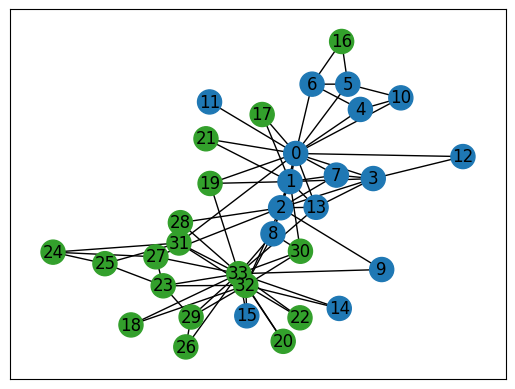

In [ ]:
#pdf 8
# وارد کردن کتابخانه NetworkX برای کار با گراف‌ها
import networkx as nx

# ایجاد گراف کاراته کلاب (Karate Club Graph)
G = nx.karate_club_graph()

# تعریف اعضای هر باشگاه
member_club = [
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  # گروه 1
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1   # گروه 2
]

# تنظیم ویژگی 'club' برای گره‌ها در گراف
nx.set_node_attributes(G, dict(enumerate(member_club)), 'club')

# تنظیم ویژگی 'isinternal' برای یال‌ها (درونی یا بیرونی بودن یال‌ها)
nx.set_edge_attributes(G, {i: 'internal' for i in G.edges}, 'isinternal')

# به‌روزرسانی یال‌ها برای مشخص کردن یال‌های درونی و بیرونی
for v, w in G.edges:
    if G.nodes[v]['club'] != G.nodes[w]['club']:
        G.edges[v, w]['isinternal'] = 'external'

# تنظیم رنگ گره‌ها بر اساس ویژگی 'club'
node_colors = ['#1f78b4' if G.nodes[v]['club'] == 0 else '#33a02c' for v in G]

# ترسیم گراف با استفاده از NetworkX
nx.draw_networkx(G, with_labels=True, node_color=node_colors)

# تابع برای محاسبه قدرت اتصال بین دو گره
def tie_strength(G, v, w):
    """
    محاسبه قدرت اتصال بین دو گره (v و w) در گراف G.
    قدرت اتصال برابر است با تعداد همسایگان مشترک بین دو گره به علاوه یک.

    ورودی‌ها:
        G: گراف
        v, w: گره‌های مورد نظر

    خروجی:
        قدرت اتصال بین گره‌های v و w
    """
    # دریافت همسایگان گره v
    v_neighbors = set(G.neighbors(v))
    # دریافت همسایگان گره w
    w_neighbors = set(G.neighbors(w))
    # بازگرداندن تعداد همسایگان مشترک به همراه یک
    return 1 + len(v_neighbors & w_neighbors)

# محاسبه قدرت اتصال برای تمام یال‌های گراف
strength = dict(((v, w), tie_strength(G, v, w)) for v, w in G.edges())

# چاپ قدرت اتصال برای بررسی
print("Tie Strengths:", strength)


In [2]:
import networkx as nx

# تعریف گراف کاراته
G = nx.karate_club_graph()

# دیکشنری قدرت یال‌ها
strength = {edge: G.edges[edge].get('strength', 1) for edge in G.edges()}

# تابع محاسبه فاصله پس از حذف یال
def bridge_span(G):
    # لیست یال‌ها
    edges = G.edges()
    # کپی از گراف
    G = nx.Graph(G)
    # دیکشنری برای ذخیره نتایج
    result = dict()

    for v, w in edges:
        # موقتی حذف کردن یال
        G.remove_edge(v, w)
        # محاسبه فاصله پس از حذف یال
        try:
            d = nx.shortest_path_length(G, v, w)
            result[(v, w)] = d
        except nx.NetworkXNoPath:
            result[(v, w)] = float('inf')
        # بازگرداندن یال
        G.add_edge(v, w)

    return result

# محاسبه فاصله یال‌ها
span = bridge_span(G)

# مرتب‌سازی یال‌ها بر اساس قدرت یال
ordered_edges = sorted(strength.items(), key=lambda x: x[1])

# چاپ عنوان جدول
print('Edge\tStrength\tSpan\tInternal')

# چاپ اطلاعات تمام یال‌ها
for e, edge_strength in ordered_edges:
    print('{}\t\t{}\t\t{}\t{}'.format(
        str(e), edge_strength, span[e], G.edges[e].get('isinternal', False)
    ))

# چاپ 10 یال با بیشترین قدرت
print("\n10 Strongest Edges:")
for e, edge_strength in ordered_edges[:10]:
    print('{}\t\t{}\t\t{}\t{}'.format(
        str(e), edge_strength, span[e], G.edges[e].get('isinternal', False)
    ))

# چاپ 10 یال با کمترین قدرت
print("\n10 Weakest Edges:")
for e, edge_strength in ordered_edges[-10:]:
    print('{}\t\t{}\t\t{}\t{}'.format(
        str(e), edge_strength, span[e], G.edges[e].get('isinternal', False)
    ))

# چاپ تمام یال‌ها با ویژگی اضافه شده
print("\nFull Edge List with Added Feature:")
for e, edge_strength in ordered_edges:
    print('{}\t\t{}\t\t{}\t{}'.format(
        str(e), edge_strength, span[e], G.edges[e].get('isinternal', False)
    ))


Edge	Strength	Span	Internal
(0, 1)		1		2	False
(0, 2)		1		2	False
(0, 3)		1		2	False
(0, 4)		1		2	False
(0, 5)		1		2	False
(0, 6)		1		2	False
(0, 7)		1		2	False
(0, 8)		1		2	False
(0, 10)		1		2	False
(0, 11)		1		inf	False
(0, 12)		1		2	False
(0, 13)		1		2	False
(0, 17)		1		2	False
(0, 19)		1		2	False
(0, 21)		1		2	False
(0, 31)		1		3	False
(1, 2)		1		2	False
(1, 3)		1		2	False
(1, 7)		1		2	False
(1, 13)		1		2	False
(1, 17)		1		2	False
(1, 19)		1		2	False
(1, 21)		1		2	False
(1, 30)		1		3	False
(2, 3)		1		2	False
(2, 7)		1		2	False
(2, 8)		1		2	False
(2, 9)		1		3	False
(2, 13)		1		2	False
(2, 27)		1		3	False
(2, 28)		1		3	False
(2, 32)		1		2	False
(3, 7)		1		2	False
(3, 12)		1		2	False
(3, 13)		1		2	False
(4, 6)		1		2	False
(4, 10)		1		2	False
(5, 6)		1		2	False
(5, 10)		1		2	False
(5, 16)		1		2	False
(6, 16)		1		2	False
(8, 30)		1		2	False
(8, 32)		1		2	False
(8, 33)		1		2	False
(9, 33)		1		3	False
(13, 33)		1		3	False
(14, 32)		1		2	False
(14, 33)		1		2	False
(15, 32)		1		2	False
(15,